In [1]:
import pandas as pd
from nilearn import plotting
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import nibabel as nib

In [2]:
df = pd.read_csv('mni_coordinates_all_subs.csv')

In [3]:
df['subject'].value_counts()

subject
BJH046     229
BJH021     226
BJH017     218
BJH016     218
BJH027     214
BJH029     190
SLCH002    186
BJH051     181
BJH050     172
BJH039     156
BJH025     156
BJH026     150
SLCH018    126
LL14       122
BJH041     116
LL13        88
LL12        86
LL10        74
LL19        74
LL17        72
Name: count, dtype: int64

In [4]:
def plot_on_brain(df, subject, title, save=False):
    """
    Plot the coordinates on the brain.
    """
    df = df[df['subject'] == subject]
    coords = df[['x', 'y', 'z']].values
    plt.figure(figsize=(10, 10))
    plotting.plot_connectome(np.eye(len(coords)), coords, node_size=10, node_color='red', edge_kwargs={'alpha': 0.5})
    plt.title(title)
    if save:
        plt.savefig(f'{subject}.png')
    plt.show()
    

In [5]:
with open('/home/brooke/pacman/preprocessing/scripts/roi.py') as file:
    exec(file.read())

In [6]:
# fix mismatch in SLCH018 names by removing ` from all entries in each item in dictionary
for key in ROIs['SLCH018'].keys():
    # replace if roi starts with `
    ROIs['SLCH018'][key] = [roi.replace('`', '')[:1] + 'L' + roi[2:] if roi.startswith('`') else roi.replace('`', 'R') for roi in ROIs['SLCH018'][key]]

# Inverting the ROIs dictionary to map subjects and electrodes to regions
subject_electrode_to_region = {}
for subject, regions in ROIs.items():
    for region, electrodes in regions.items():
        for electrode in electrodes:
            subject_electrode_to_region[(subject, electrode)] = region

# Function to apply to each row
def map_electrode_to_region(row):
    return subject_electrode_to_region.get((row['subject'], row['Electrode']), 'Unknown')

# Creating the new 'region' column
df['region'] = df.apply(map_electrode_to_region, axis=1)

# filter out unknow #
df = df[df['region'] != "Unknown"]
df = df[df['region'] != "ec"]
df = df[df['region'] != "insula"]


In [7]:
pd.options.display.max_rows = 250

In [8]:
df['region'].value_counts()

region
hc       174
ofc      144
mfg      129
amyg     115
dACC      46
sfg       37
sgACC     23
Name: count, dtype: int64

In [9]:
23 + 46

69

In [10]:
df.to_csv('mni_coordinates_all_subs_with_detailed_regions.csv', index=False)

In [11]:
## replace mfg, sfg, with dlpfc with region colum
df = df[df['region'] != "sfg"]
# df['region'] = df['region'].replace({'mfg': 'dlpfc', 'sfg': 'dlpfc'})
df['region'] = df['region'].replace({'sgACC': 'cingulate', 'dACC': 'cingulate'})



In [12]:
# Load the .nii file
nii_file_path = 'AAL.nii'
nii_img = nib.load(nii_file_path)
brain_data = nii_img.get_fdata()

## Hippocampus ##
# Threshold the hippocampus data to get a binary mask
hippocampus_mask = (brain_data == 4101) | (brain_data == 4102)

# Get the voxel coordinates of the hippocampus
hippocampus_voxel_coords = np.column_stack(np.where(hippocampus_mask))

# Convert voxel coordinates to MNI coordinates
affine = nii_img.affine
hippocampus_mni_coords = nib.affines.apply_affine(affine, hippocampus_voxel_coords)

# Threshold the Amygdala data to get a binary mask
amygdala_mask = (brain_data == 4201) | (brain_data == 4202)

# Get the voxel coordinates of the Amygdala
amygdala_voxel_coords = np.column_stack(np.where(amygdala_mask))

# Convert voxel coordinates to MNI coordinates
affine = nii_img.affine
amygdala_mni_coords = nib.affines.apply_affine(affine, amygdala_voxel_coords)

# Threshold the OFC data to get a binary mask
ofc_mask = (brain_data == 2211) | (brain_data == 2212) | (brain_data == 2111) | (brain_data == 2112)

# Get the voxel coordinates of the OFC
ofc_voxel_coords = np.column_stack(np.where(ofc_mask))

# Convert voxel coordinates to MNI coordinates
affine = nii_img.affine
ofc_mni_coords = nib.affines.apply_affine(affine, ofc_voxel_coords)

# Threshold the Cing data to get a binary mask
cing_mask = (brain_data == 4001) | (brain_data == 4002) 

# Get the voxel coordinates of the hippocampus
cing_voxel_coords = np.column_stack(np.where(cing_mask))

# Convert voxel coordinates to MNI coordinates
affine = nii_img.affine
cing_mni_coords = nib.affines.apply_affine(affine, cing_voxel_coords)


# Threshold the Insula data to get a binary mask
insula_mask = (brain_data == 3001) | (brain_data == 3002) 

# Get the voxel coordinates of the hippocampus
insula_voxel_coords = np.column_stack(np.where(insula_mask))

# Convert voxel coordinates to MNI coordinates
affine = nii_img.affine
insula_mni_coords = nib.affines.apply_affine(affine, insula_voxel_coords)


# Threshold the dlpfc data to get a binary mask
dlpfc_mask = (brain_data == 2201) | (brain_data == 2202)

# Get the voxel coordinates of the hippocampus
dlpfc_voxel_coords = np.column_stack(np.where(dlpfc_mask))

# Convert voxel coordinates to MNI coordinates
affine = nii_img.affine
dlpfc_mni_coords = nib.affines.apply_affine(affine, dlpfc_voxel_coords)



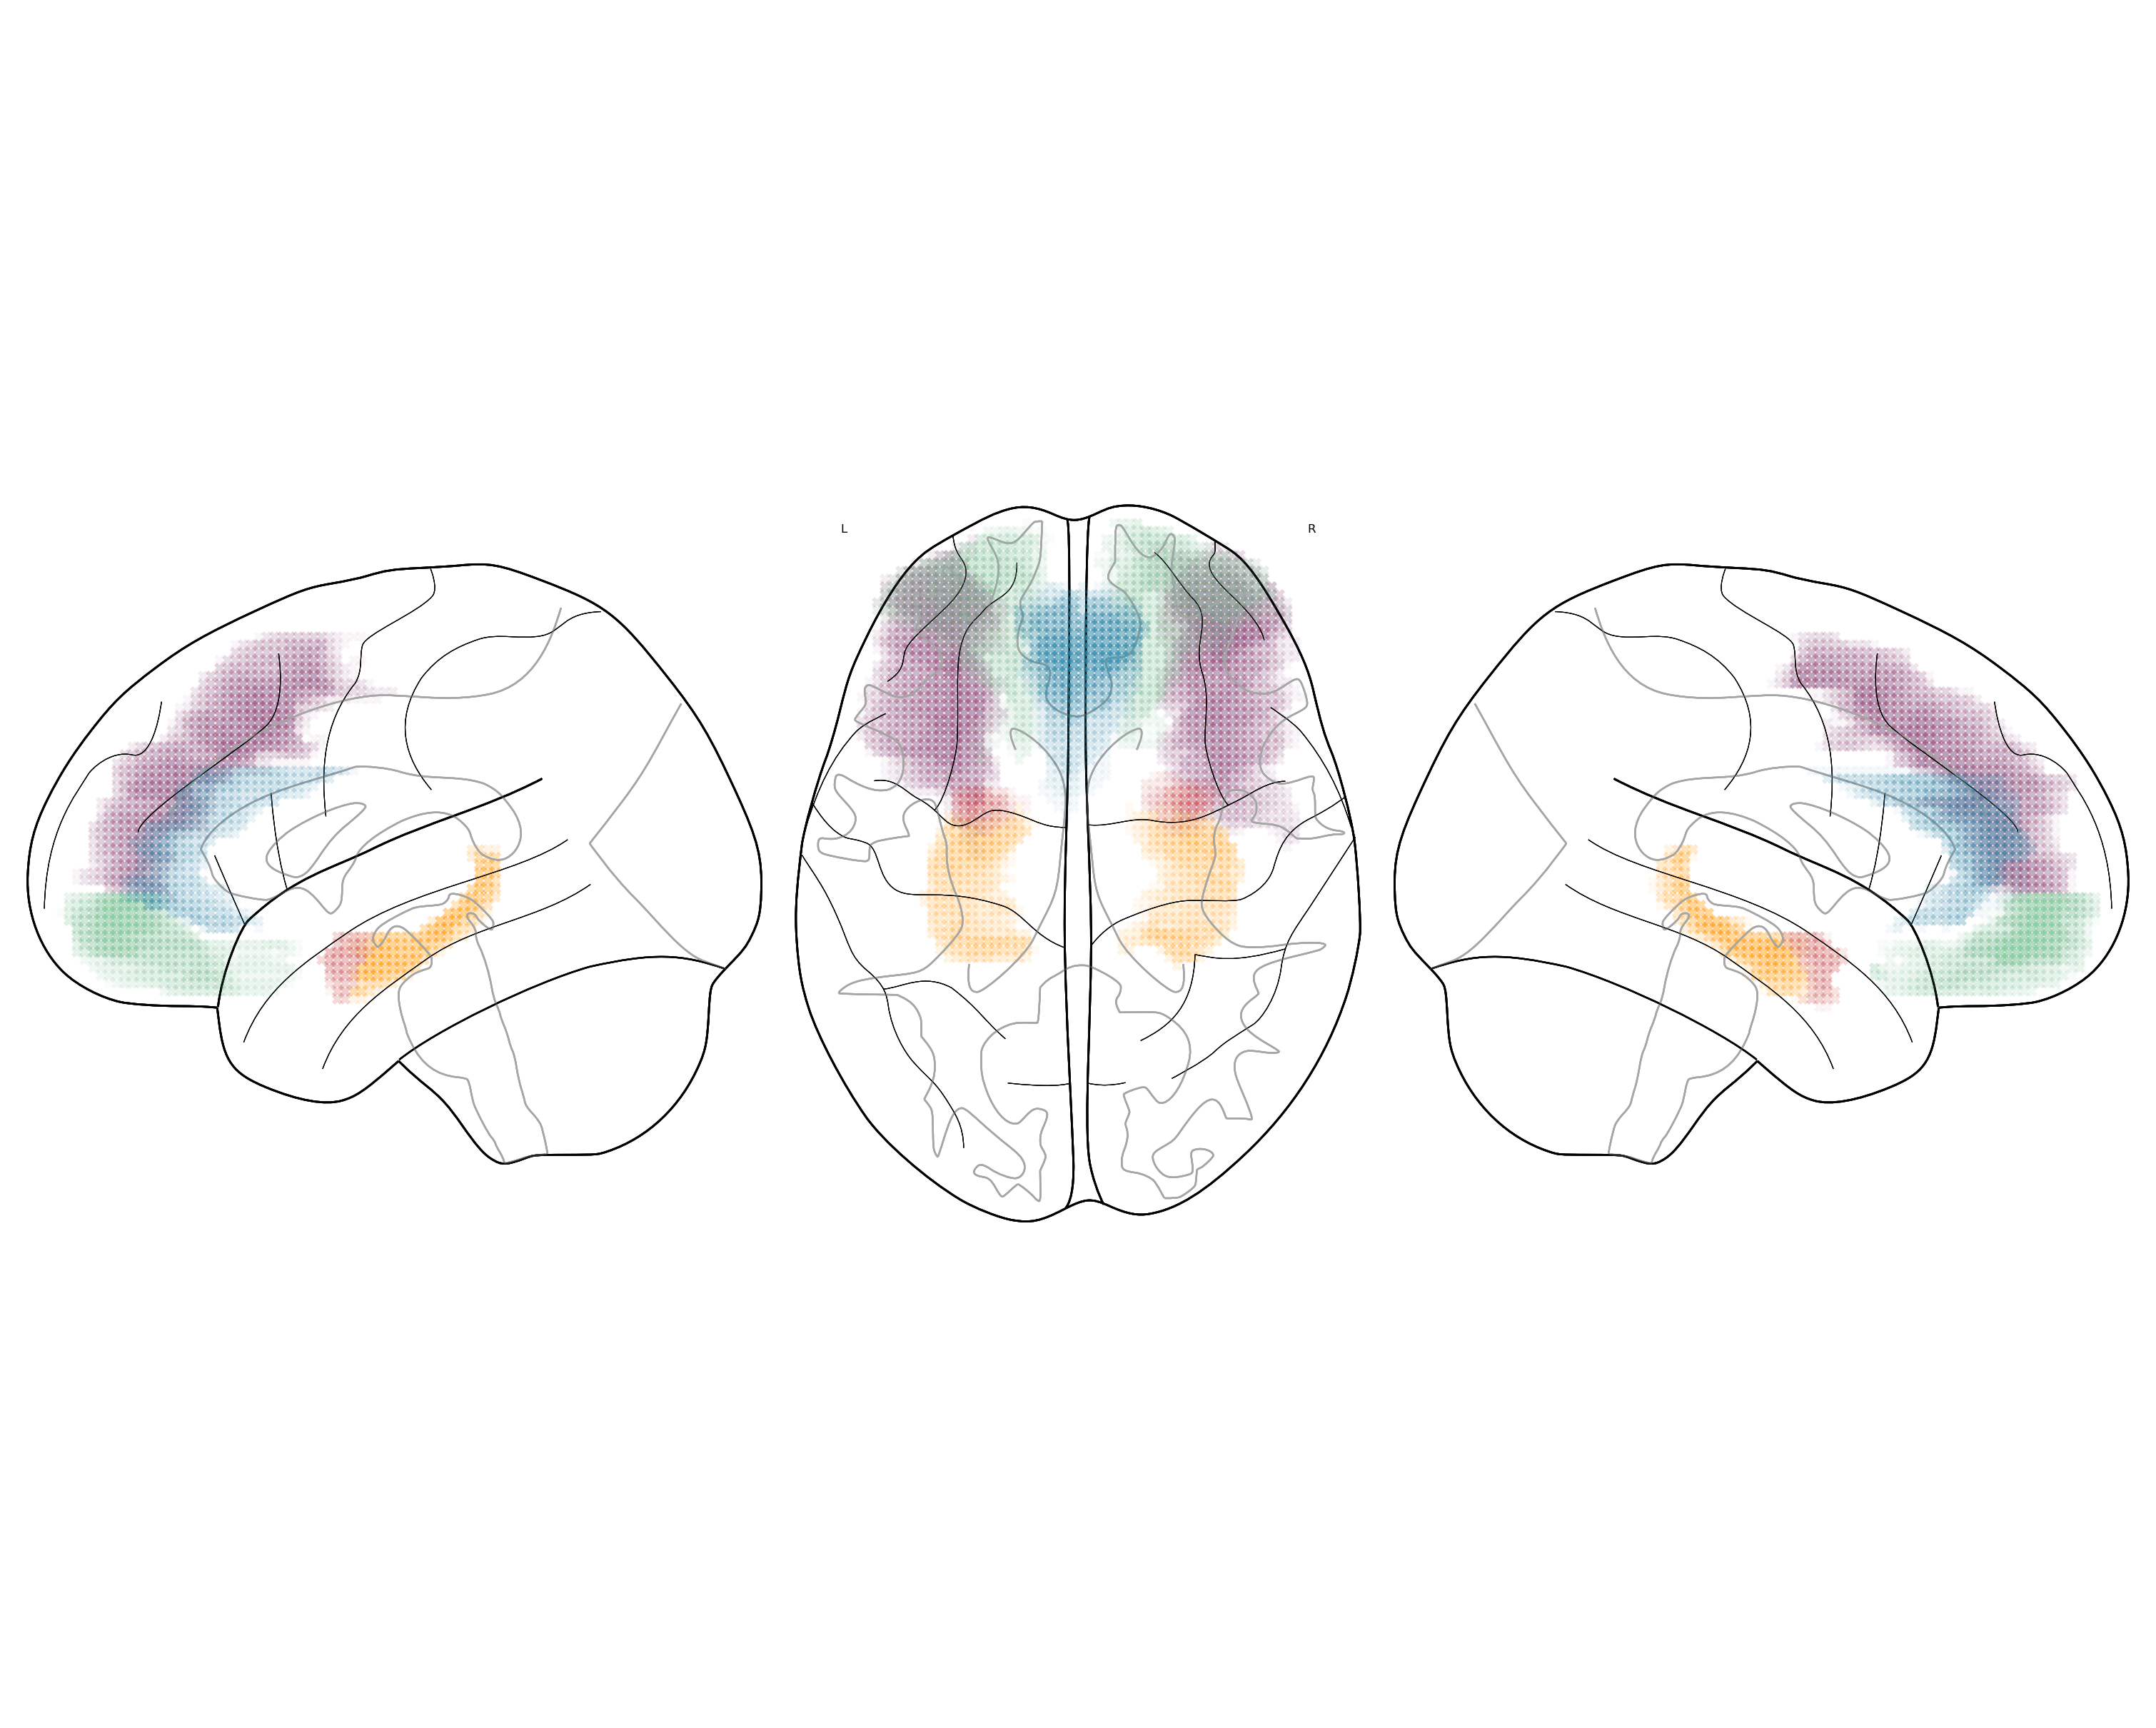

In [14]:
# %%ai

plt.rcParams['figure.figsize'] = [30, 24] 
fig = plt.figure(figsize=(30, 24))

# Extract coordinates and colors from the dataframe
coordinates = df[['X', 'Y', 'Z']].values
regions = df['region'].values

# Create a custom colormap if needed (e.g., based on the unique colors in your CSV)
unique_colors = np.unique(regions)
# cmap = cm.get_cmap('viridis', len(unique_colors))
# colors = [cmap(i) for i in np.linspace(0, 1, len(unique_colors))]
# colors = c("Amygdala" = "#DE4A4D", "Hippocampus" = "#FFA602", "OFC" =  "#88D1A3", "Ant. Cingulate"=  "#3D99BA", "Insula" =  "#876194",  "dlPFC" = "#FB6087")
colors = [
    (0.8706, 0.2902, 0.3020, 1), # red, amygdala
    (1.0000, 0.6510, 0.0078, 1), # orange, hippocampus
    (0.2392, 0.6000, 0.7294, 1), # blue, cingulate
    (0.5294, 0.3804, 0.5804, 1), # purple, dlpfc
    (0.5333, 0.8196, 0.6392, 1) # green, ofc

]

# Create a dictionary that maps each unique value in df['Origin'] to a unique color
color_map = {region: color for region, color in zip(df['region'].unique(), colors)}

# Create a new 'Color' column based on the 'Origin' column
df['Color'] = df['region'].map(color_map).values
region_colors = df['Color'].values

# Plot the brain with the coordinates
# Create an adjacency matrix with zeros (no connections)
adjacency_matrix = np.zeros((len(coordinates), len(coordinates)))
hc_adjacency_matrix = np.zeros((len(hippocampus_mni_coords), len(hippocampus_mni_coords)))
amyg_adjacency_matrix = np.zeros((len(amygdala_mni_coords), len(amygdala_mni_coords)))
ofc_adjacency_matrix = np.zeros((len(ofc_mni_coords), len(ofc_mni_coords)))
cing_adjacency_matrix = np.zeros((len(cing_mni_coords), len(cing_mni_coords)))
insula_adjacency_matrix = np.zeros((len(insula_mni_coords), len(insula_mni_coords)))
dlpfc_adjacency_matrix = np.zeros((len(dlpfc_mni_coords), len(dlpfc_mni_coords)))

# Plot the nodes without connections
plotting.plot_connectome(dlpfc_adjacency_matrix, dlpfc_mni_coords, node_color=[(0.5294, 0.3804, 0.5804, .05)], node_size=100, node_kwargs = {'edgecolors':[(0.9843, 0.3765, 0.5294, .02)], 'marker':'X'}, display_mode='lzr', figure=fig)
plotting.plot_connectome(hc_adjacency_matrix, hippocampus_mni_coords, node_color=[(1.0000, 0.6510, 0.0078, .05)], node_size=100, node_kwargs = {'edgecolors':[(1.0000, 0.6510, 0.0078, .02)], 'marker':'X'}, display_mode='lzr', figure=fig)
plotting.plot_connectome(amyg_adjacency_matrix, amygdala_mni_coords, node_color=[(0.8706, 0.2902, 0.3020, .05)], node_size=100, node_kwargs = {'edgecolors':[(0.8706, 0.2902, 0.3020, .02)], 'marker':'X'}, display_mode='lzr', figure=fig)
plotting.plot_connectome(ofc_adjacency_matrix, ofc_mni_coords, node_color=[(0.5333, 0.8196, 0.6392, .05)], node_size=100, node_kwargs = {'edgecolors':[(0.5333, 0.8196, 0.6392, .02)], 'marker':'X'}, display_mode='lzr', figure=fig)
plotting.plot_connectome(cing_adjacency_matrix, cing_mni_coords, node_color=[(0.2392, 0.6000, 0.7294, .05)], node_size=100, node_kwargs = {'edgecolors':[(0.2392, 0.6000, 0.7294, .02)], 'marker':'X'}, display_mode='lzr', figure=fig)

# Plot limbic vs non-limbic
# plotting.plot_connectome(dlpfc_adjacency_matrix, dlpfc_mni_coords, node_color=[(0.5294, 0.3804, 0.5804, .05)], node_size=100, node_kwargs = {'edgecolors':[(0.9843, 0.3765, 0.5294, .02)], 'marker':'X'}, display_mode='lzr', figure=fig)
# plotting.plot_connectome(hc_adjacency_matrix, hippocampus_mni_coords, node_color=[(0.9843, 0.3765, 0.5294, .05)], node_size=100, node_kwargs = {'edgecolors':[(0.5294, 0.3804, 0.5804, .02)], 'marker':'X'}, display_mode='lzr', figure=fig)
# plotting.plot_connectome(amyg_adjacency_matrix, amygdala_mni_coords, node_color=[(0.9843, 0.3765, 0.5294, .05)], node_size=100, node_kwargs = {'edgecolors':[(0.5294, 0.3804, 0.5804, .02)], 'marker':'X'}, display_mode='lzr', figure=fig)
# plotting.plot_connectome(ofc_adjacency_matrix, ofc_mni_coords, node_color=[(0.9843, 0.3765, 0.5294, .05)], node_size=100, node_kwargs = {'edgecolors':[(0.5294, 0.3804, 0.5804, .02)], 'marker':'X'}, display_mode='lzr', figure=fig)
# plotting.plot_connectome(cing_adjacency_matrix, cing_mni_coords, node_color=[(0.9843, 0.3765, 0.5294, .05)], node_size=100, node_kwargs = {'edgecolors':[(0.5294, 0.3804, 0.5804, .02)], 'marker':'X'}, display_mode='lzr', figure=fig)
#plotting.plot_connectome(insula_adjacency_matrix, insula_mni_coords, node_color=[(0.5294, 0.3804, 0.5804, .05)], node_size=100, node_kwargs = {'edgecolors':[(0.5294, 0.3804, 0.5804, .02)], 'marker':'X'}, display_mode='lzr', figure=fig)


# plotting.plot_connectome(adjacency_matrix, coordinates, node_color=region_colors, node_size=100, node_kwargs = {'edgecolors':'black', 'marker':'o'},  display_mode='lzr', figure=fig)





In [15]:
# fig.savefig('./paper_MNI_plot.png')
fig.savefig('./blank_MNI_plot.png')
# fig.savefig('./blank_limbic_MNI_plot.png')

In [15]:
# df